# Benchmarking Derivative Estimation on Standard Functions

In this section, we benchmark the performance of finite difference and adaptive polynomial fitting methods on a set of **well-behaved (smooth)** functions. These functions are expected to respond well to polynomial fitting and serve as a controlled environment for assessing accuracy and robustness under noise.

---

### Functions Used

We define two groups of functions:

- **Standard (smooth) functions:**
  - $f(x) = 2x + 3$  (Linear)
  - $f(x) = x^2 - 4x + 2$  (Quadratic)
  - $f(x) = \sin(x)$  (Trigonometric)
  - $f(x) = x^3 - 3x^2 + 2x + 1$  (Cubic)
  - $f(x) = e^{-x^2}$  (Gaussian)

These functions are differentiable and should yield consistent results across derivative methods.

---

### Configuration

- **Evaluation point:** $x_0 = 0.04$
- **Noise model:** Gaussian noise with standard deviation $\sigma = 0.02$
- **Derivative order:** First-order ($f'(x)$)
- **Trials:** 100 Monte Carlo trials
- **Fit tolerance:** 0.05 (used by adaptive fitting)
- **Plot directory:** `plots/standard_fn`

---

### Plots Generated

For each function, we generate a series of visual diagnostics:

1. **Overlaid Histograms**
   - Shows the distribution of derivative estimates under noise.
   - Compares the spread and bias of both methods.

2. **MSE vs. Noise Level**
   - Computes mean squared error (MSE) across varying noise levels.
   - Visualizes sensitivity and robustness.

3. **Empirical CDF of Squared Errors**
   - Plots ECDFs to assess how often each method produces low-error estimates.

4. **Paired Error Differences**
   - Computes trial-by-trial squared error differences.
   - Reveals which method performs better and how often.

5. **Multi-Order Error vs. SNR Sweep**
   - Evaluates first, second, and third derivatives at $x = 0.5$
   - Plots MSE vs. inverse SNR to explore scaling behavior for each method and order.

---

These plots provide a thorough comparison of adaptive vs. finite difference derivative methods in the low-noise, smooth-function regime. In the next section, we will test these methods on **pathological or blow-up functions** to evaluate their limits.


In [1]:
import warnings

import numpy as np

from derivkit.plotutils.plot_kit import PlotKit
from derivkit.plotutils.plot_kit import plot_multi_order_error_vs_noise
from notebooks.functions_dict import standard_functions, get_ordinal, fit_tolerance


In [2]:
# Suppressing warnings to keep notebook output clean for version control (e.g., Git).
# Comment out the line below if you want to see the warnings for debugging.
warnings.filterwarnings('ignore')


In [3]:
# config
deriv_order = 1
x0 = 0.04
noise_std = 0.02
trials = 100
tol = fit_tolerance[f"{deriv_order}"]
plot_dir = "plots/standard_fn"

# initialize dictionary to store plotter instances
plotters = {}

for name, func in standard_functions.items():
    print(f"Processing: {name}")
    plotter = PlotKit(
        function=func["func"],
        central_value=x0,
        derivative_order=deriv_order,
        fit_tolerance=tol,
        plot_dir=plot_dir
    )
    plotters[name] = plotter  # store for later use


Processing: linear
Processing: quadratic
Processing: trigonometric
Processing: cubic
Processing: gaussian


## Plots

### Overlaid Histograms

Processing: linear


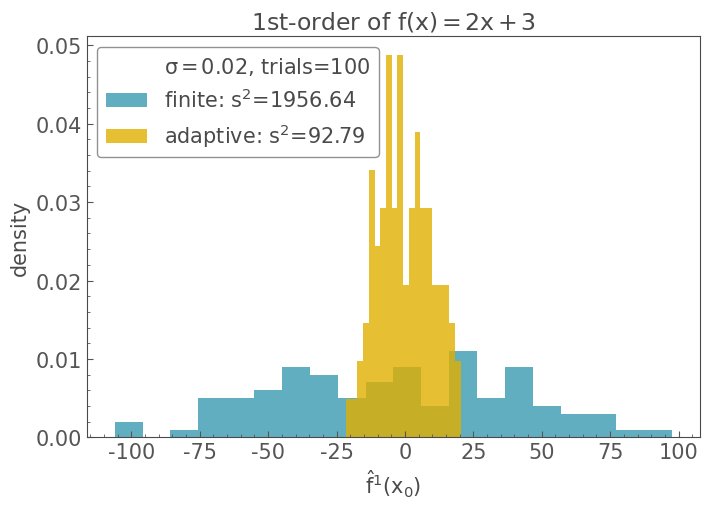

Processing: quadratic


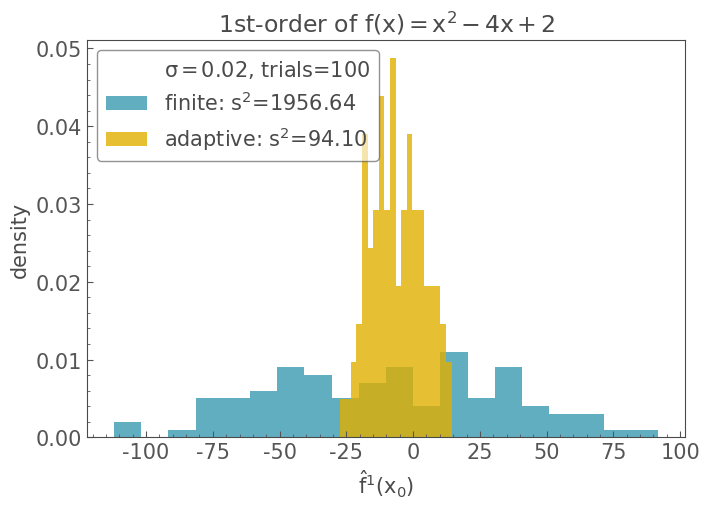

Processing: trigonometric


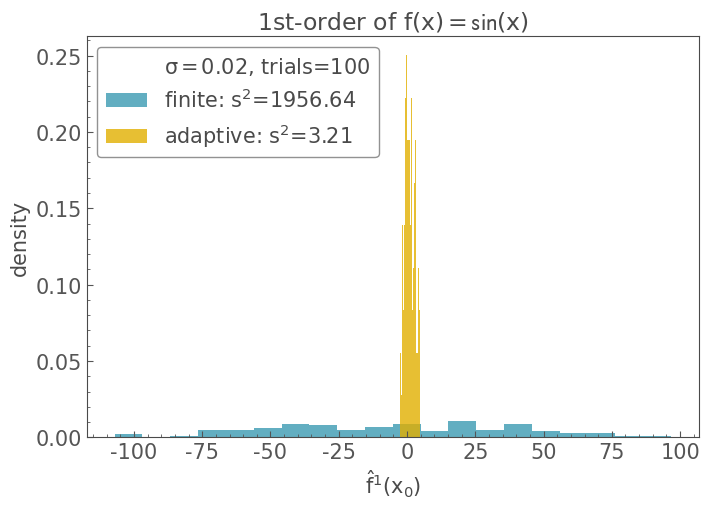

Processing: cubic


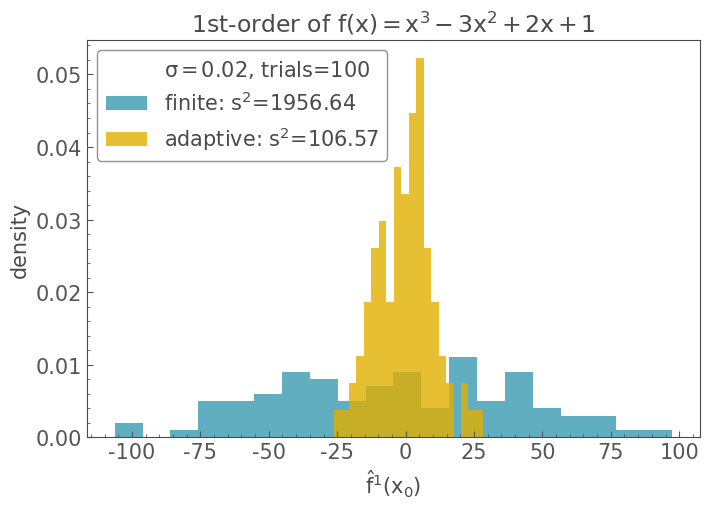

Processing: gaussian


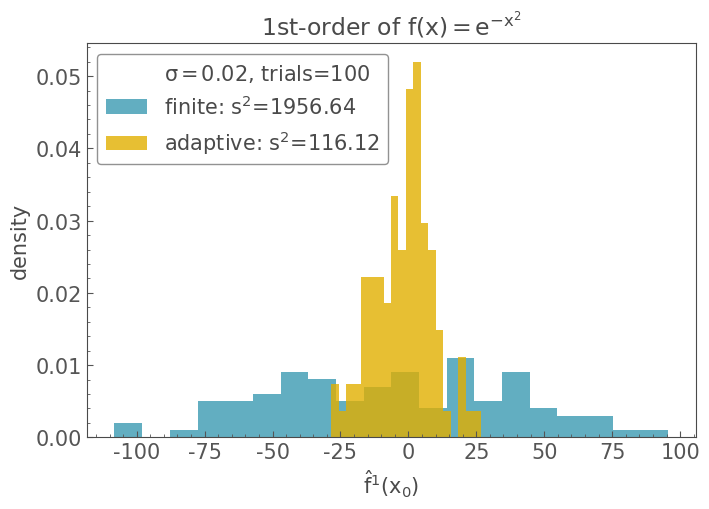

In [4]:
for name, func in standard_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_overlaid_histograms(derivative_order=deriv_order,
                                     noise_std=noise_std,
                                     title=title,
                                     extra_info=name)

### MSE vs. Noise Level

Processing: linear


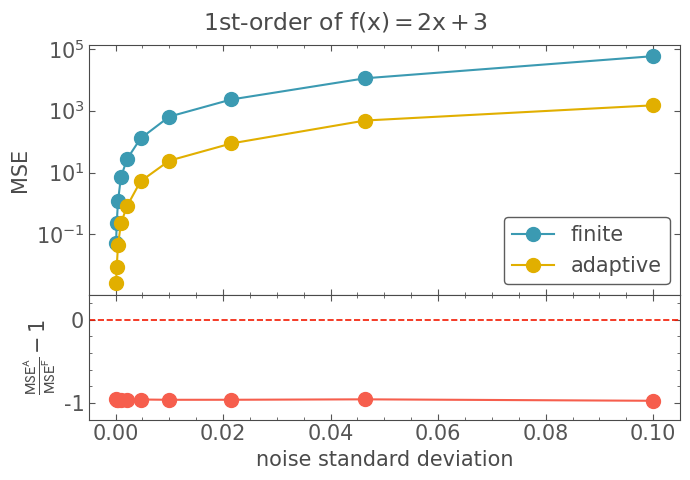

Processing: quadratic


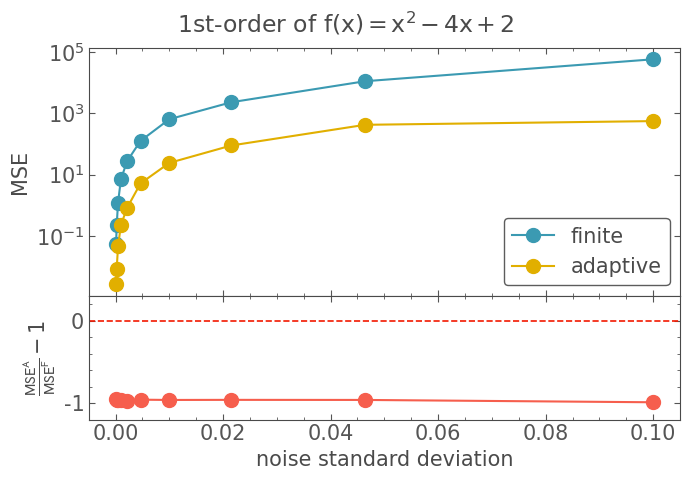

Processing: trigonometric


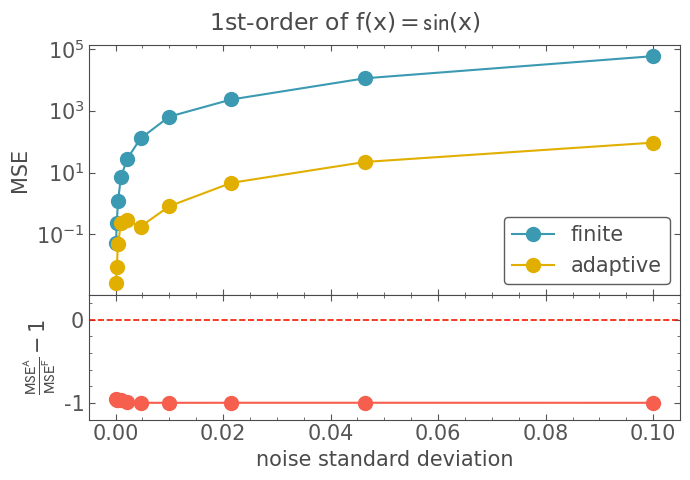

Processing: cubic


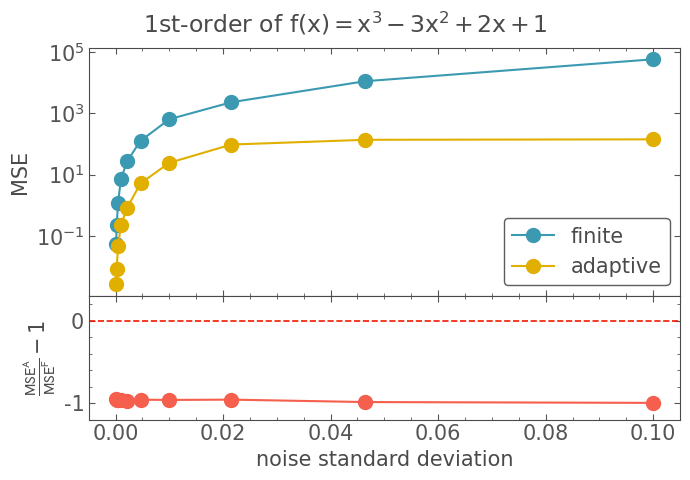

Processing: gaussian


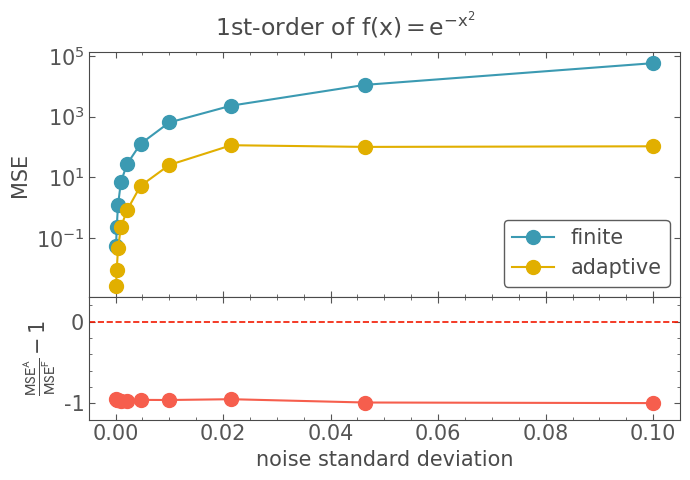

In [5]:
for name, func in standard_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    noise_levels = np.geomspace(1e-4, 1e-1, 10)  # from low to high noise
    plotter = plotters[name]
    plotter.plot_error_vs_noise(derivative_order=deriv_order,
                                noise_levels=noise_levels,
                                trials=trials,
                                title=title,
                                extra_info=name)


### Empirical CDF of Squared Errors

Processing: linear


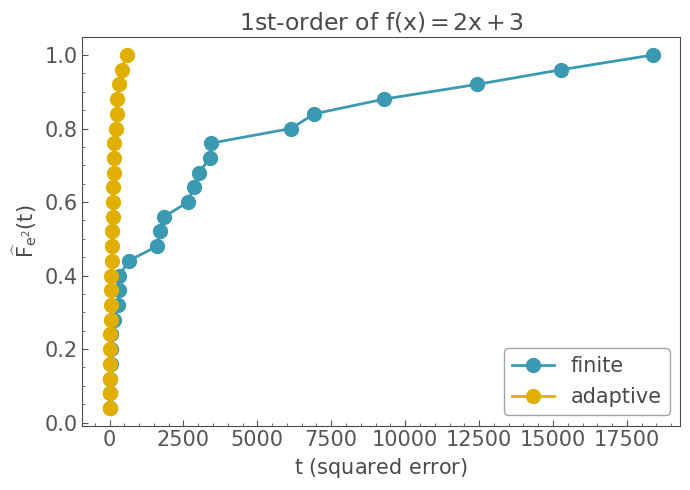

Processing: quadratic


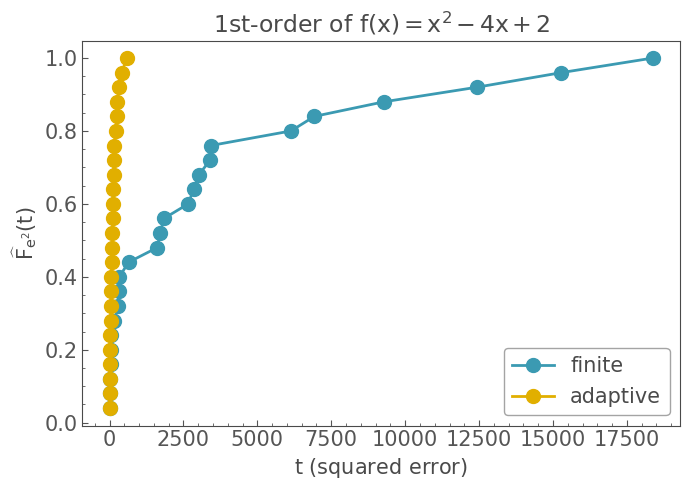

Processing: trigonometric


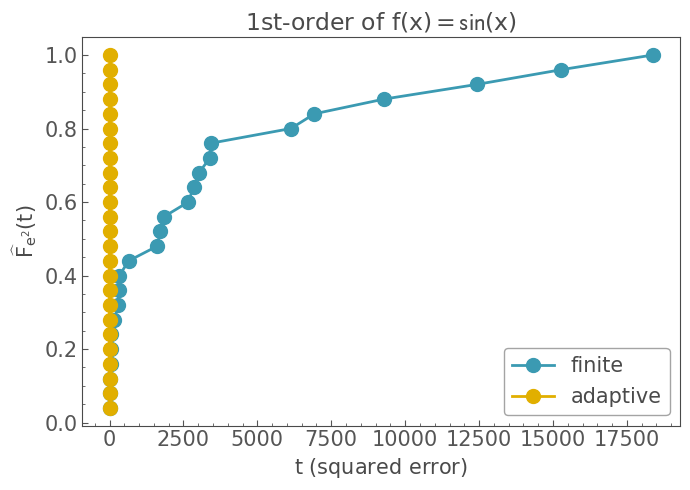

Processing: cubic


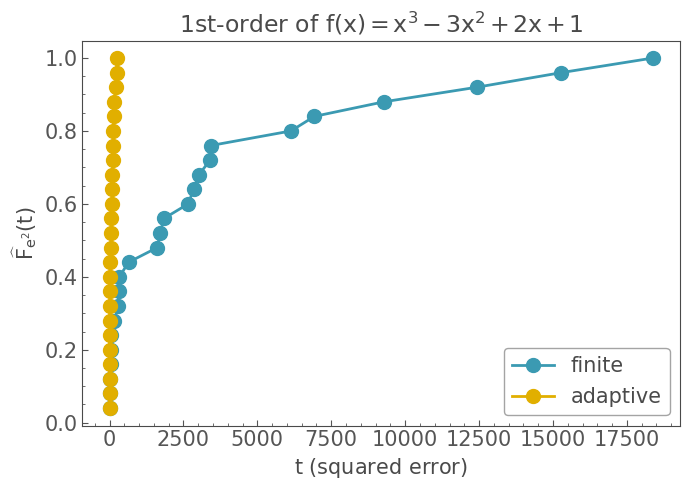

Processing: gaussian


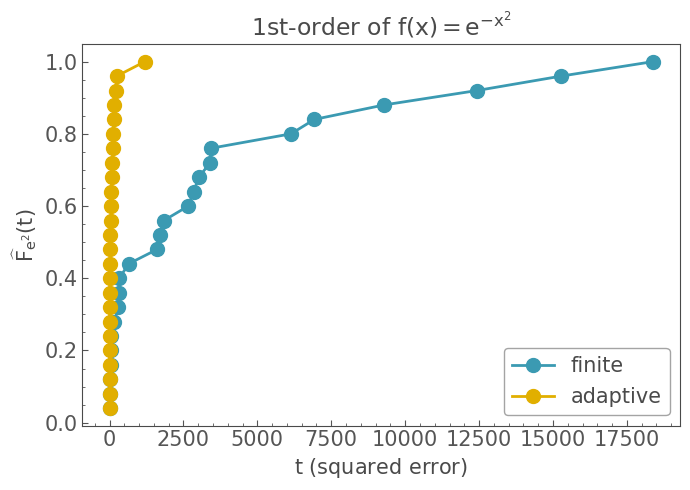

In [6]:
for name, func in standard_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_ecdf_errors(noise_std=noise_std, trials=25, title=title, extra_info=name)

### Paired Error Differences

Processing: linear


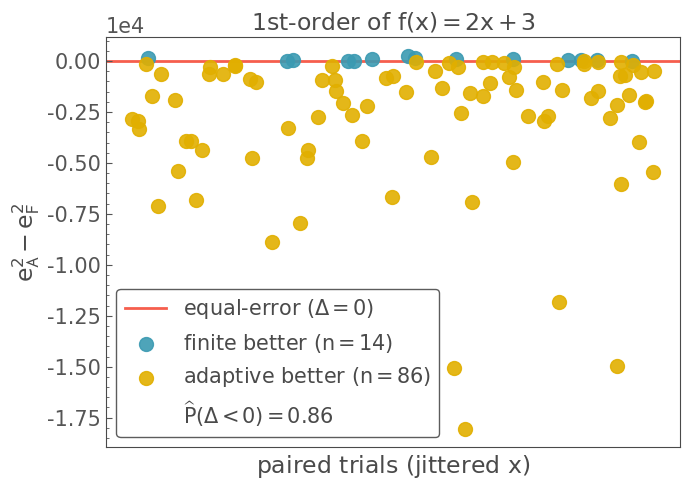

Processing: quadratic


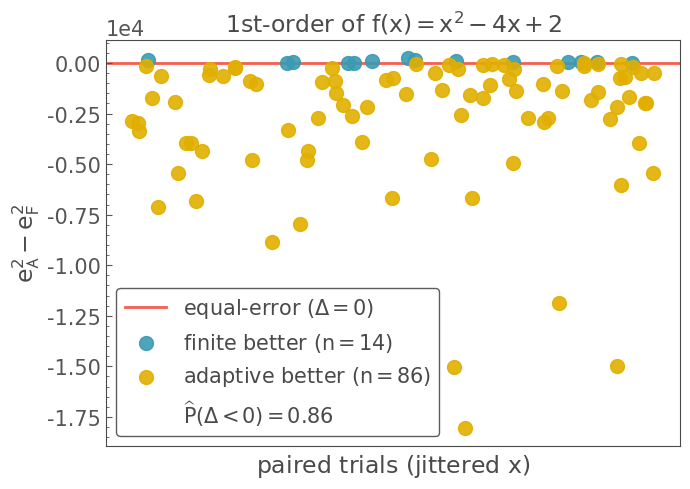

Processing: trigonometric


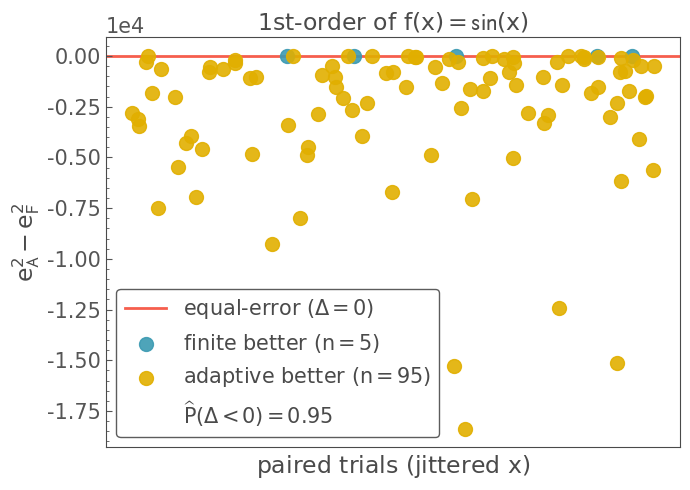

Processing: cubic


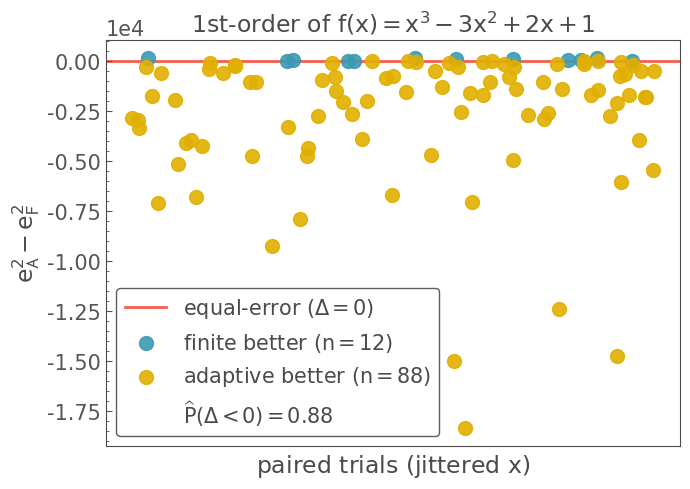

Processing: gaussian


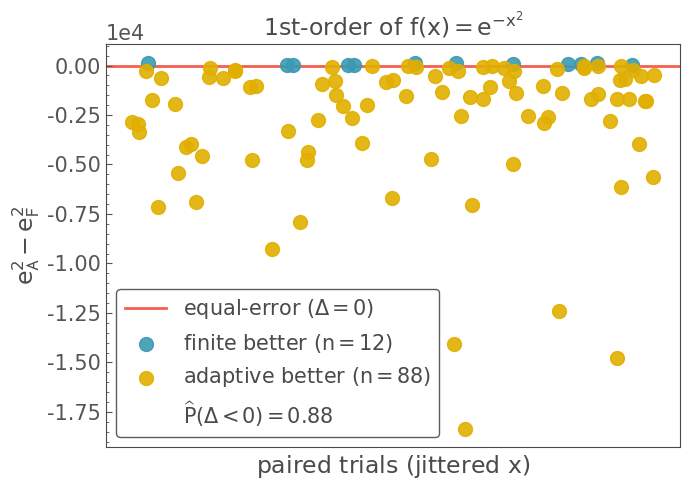

In [7]:
for name, func in standard_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_paired_error_differences(noise_std=noise_std, trials=trials, title=title, extra_info=name)


### Multi-Order Error vs. SNR Sweep

Processing: linear
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = 2x + 3$


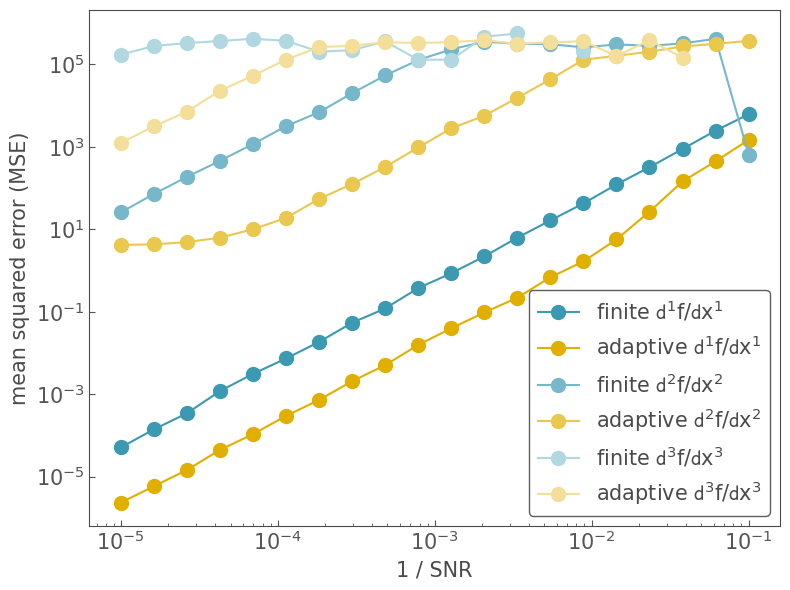

Processing: quadratic
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = x^2 - 4x + 2$


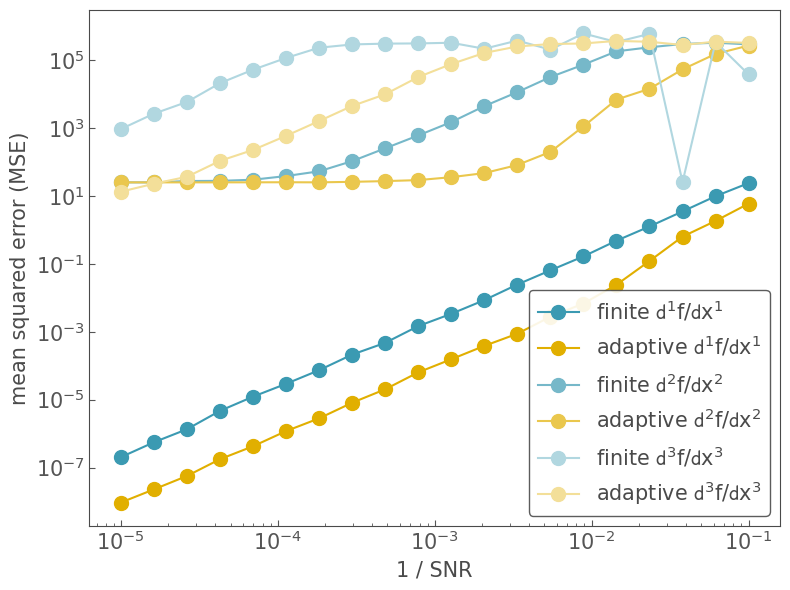

Processing: trigonometric
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = \sin(x)$


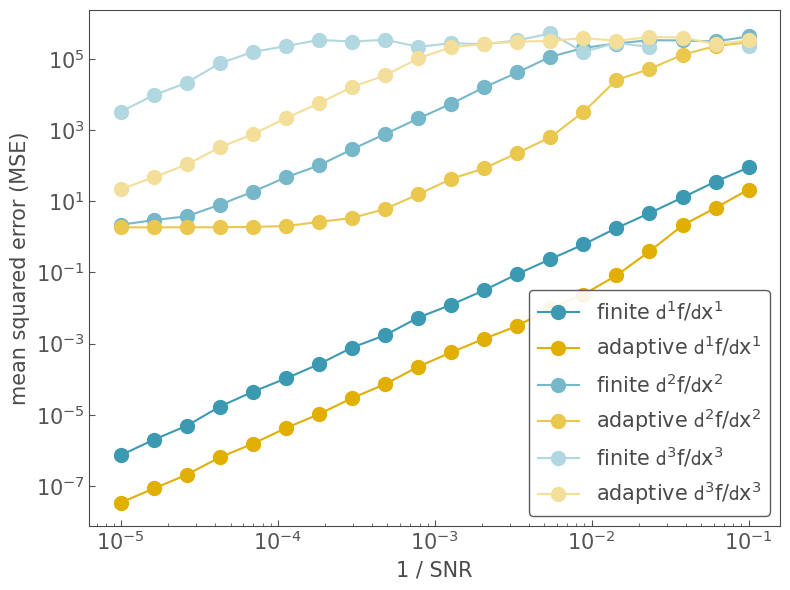

Processing: cubic
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = x^3 - 3x^2 + 2x + 1$


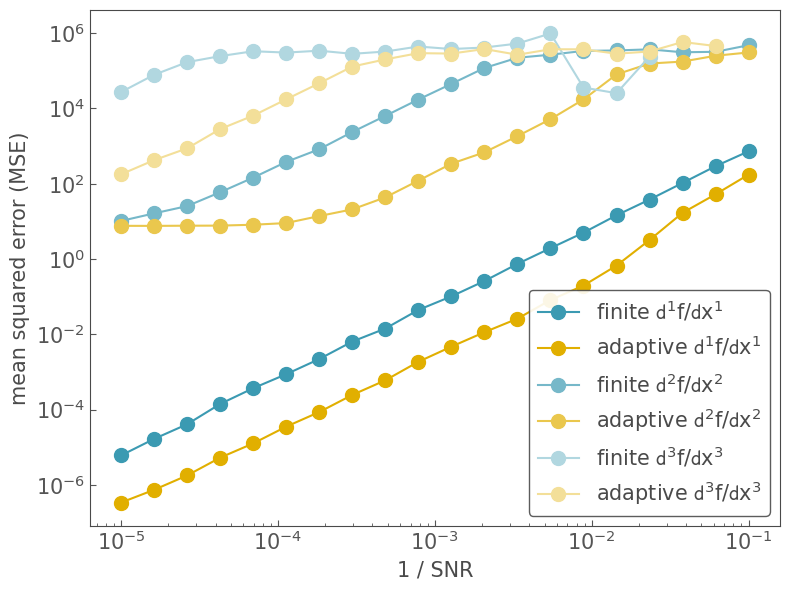

Processing: gaussian
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = e^{-x^2}$


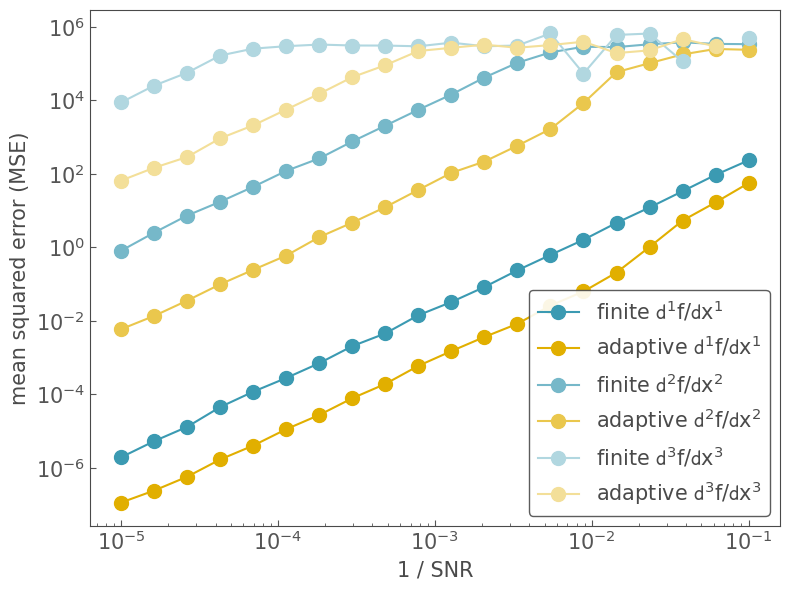

In [8]:
for name, func in standard_functions.items():
    snr_values = np.logspace(1, 5, 20)
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    print(f"fuction: {func['func'].__name__}, x_center: {0.5}, title: {title}")
    plot_multi_order_error_vs_noise(
    function=func["func"],
    central_value=0.5,
    snr_values=snr_values,
    orders=(1, 2, 3),
    trials=300,
    fit_tolerance=0.07,
    extra_info=name,
    plot_dir=plot_dir
)
